In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
Production = pd.read_csv('Africa Food Production (2004 - 2013).csv')
Production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [3]:
Supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
Supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [4]:
x = Production['Country'].unique()    #this is to know the number of countries in  the dataframe

In [5]:
print(len(x))

45


In [6]:
damola = Production.groupby('Country')['Item'].count()    #this is to know the number of items that each country produces
damola

Country
Algeria                        580
Angola                         540
Benin                          590
Botswana                       340
Burkina Faso                   430
Cabo Verde                     330
Cameroon                       650
Central African Republic       450
Chad                           390
Congo                          500
Cote d'Ivoire                  640
Djibouti                       220
Egypt                          700
Ethiopia                       600
Gabon                          400
Gambia                         360
Ghana                          580
Guinea                         500
Guinea-Bissau                  440
Kenya                          750
Lesotho                        230
Liberia                        420
Madagascar                     690
Malawi                         480
Mali                           480
Mauritania                     380
Mauritius                      460
Morocco                        770
Mozambique  

Text(0.5, 1.0, 'Food Production by Country')

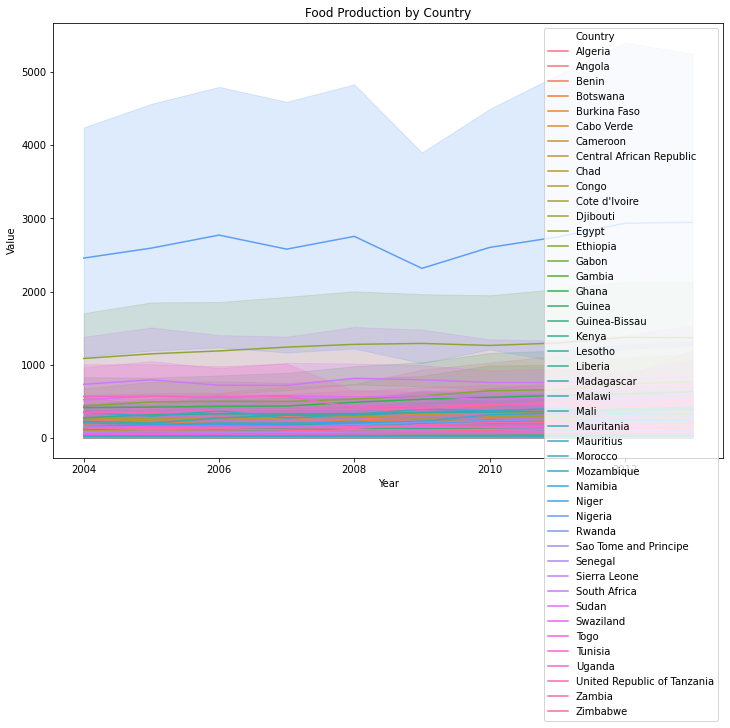

In [7]:
plt.figure(figsize = (12,8))
sns.lineplot(x='Year', y= 'Value', data=Production, hue='Country')
plt.legend(loc='upper right')
plt.title('Food Production by Country')

Text(0.5, 1.0, 'Food Supply by Country')

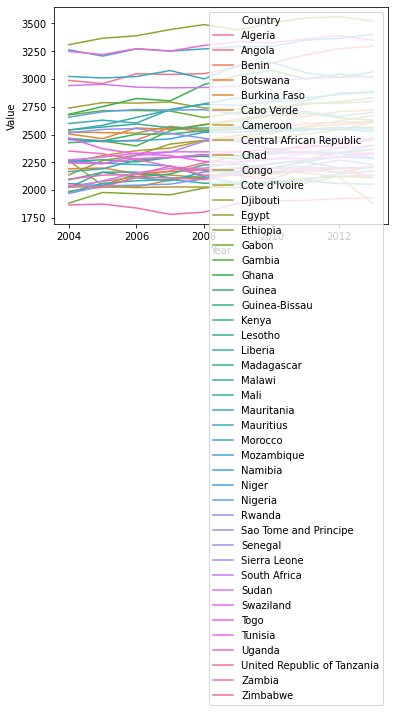

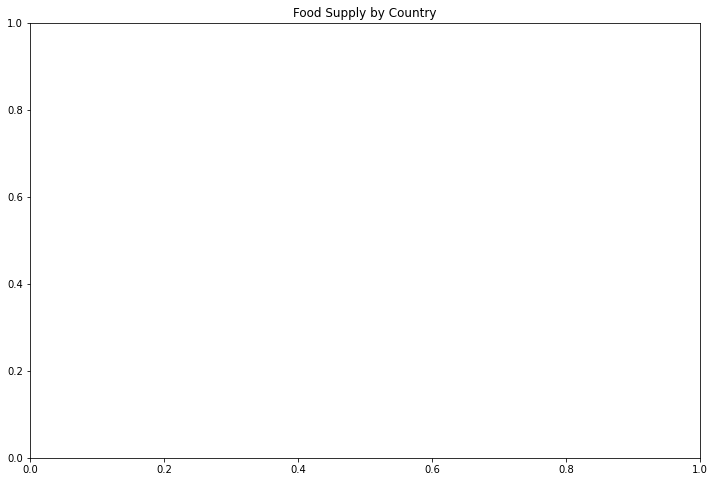

In [8]:
sns.lineplot(y='Value', x='Year',hue='Country', data=Supply)
plt.legend(loc='upper right')
plt.figure(figsize=(12,8))
plt.title('Food Supply by Country')

In [9]:
test = Production.groupby(['Country', 'Year', 'Item'])['Value'].sum()   #to see the sum of items being grouped by their value

In [10]:
DataFrame(test)

Value
Country  Year Item                        
Algeria  2004 Apples and products      165
              Bananas                    0
              Barley and products     1212
              Beans                      2
              Beer                     110
...                                    ...
Zimbabwe 2013 Tea (including mate)      19
              Tomatoes and products     24
              Vegetables, Other        203
              Wheat and products        25
              Wine                       2

[23110 rows x 1 columns]

In [11]:
test2 = Production.groupby(['Country', 'Year'])['Value'].sum()   #to view the sum of the crops produced per year

In [12]:
DataFrame(test2)

Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]

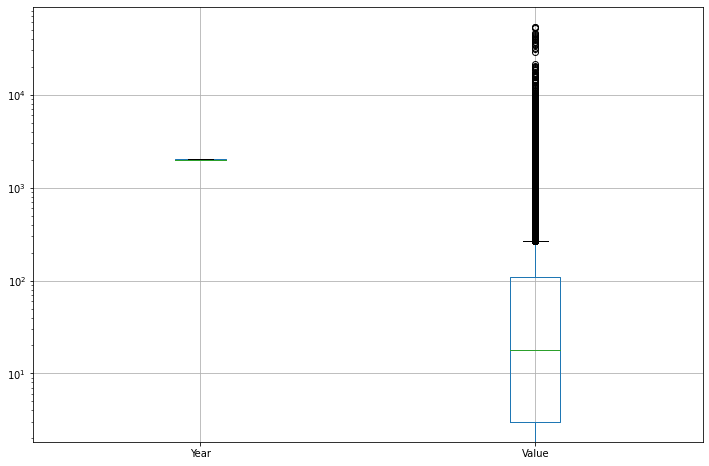

In [13]:
plt.figure(figsize=(12,8))   #a boxplot to visualize the mean, median and outliers in the Production dataframe
plt.yscale('log')
Production.boxplot()

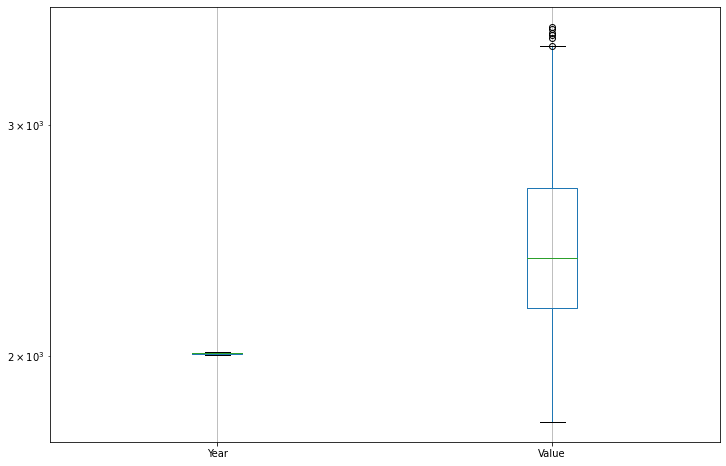

In [14]:
plt.figure(figsize=(12,8))   #a boxplot to visualize the mean, median and outliers in the Supply dataframe
plt.yscale('log')
Supply.boxplot()

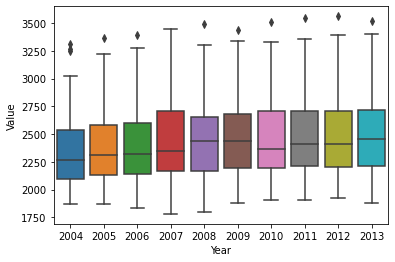

In [15]:
sns.boxplot(x='Year', y='Value', data=Supply)  #a boxplot visualization of the food supply per year

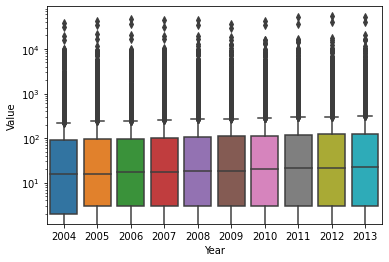

In [16]:
sns.boxplot(x='Year', y='Value', data=Production)   #a boxplot visualization of the food produced per year
plt.yscale('log')

In [17]:
Production_2010 = Production[Production['Year']== 2012]   #this is to get only the product that were produces in 2012

In [18]:
Production_2010

,Country,Item,Year,Value
8,Algeria,Wheat and products,2012,3432
18,Algeria,Rice (Milled Equivalent),2012,0
28,Algeria,Barley and products,2012,1592
38,Algeria,Maize and products,2012,2
48,Algeria,Oats,2012,110
...,...,...,...,...
23068,Zimbabwe,"Fats, Animals, Raw",2012,7
23078,Zimbabwe,Eggs,2012,30
23088,Zimbabwe,Milk - Excluding Butter,2012,410
23098,Zimbabwe,Freshwater Fish,2012,18


In [19]:
Production_2010.groupby(['Country', 'Item', 'Year'])['Value'].sum()

Country   Item                   Year
Algeria   Apples and products    2012     398
          Bananas                2012       0
          Barley and products    2012    1592
          Beans                  2012       1
          Beer                   2012     145
                                         ... 
Zimbabwe  Tea (including mate)   2012      19
          Tomatoes and products  2012      24
          Vegetables, Other      2012     203
          Wheat and products     2012      20
          Wine                   2012       2
Name: Value, Length: 2307, dtype: int64

In [20]:
Food_Supply = Supply.groupby('Year')['Value'].mean().reset_index()
Food_Production = Production.groupby('Year')['Value'].mean().reset_index()

In [21]:
Food_Supply = Food_Supply.rename(columns={'Value':'Supply'})
print(Food_Supply)

   Year       Supply
0  2004  2394.222222
1  2005  2409.288889
2  2006  2430.800000
3  2007  2447.755556
4  2008  2460.755556
5  2009  2482.222222
6  2010  2497.400000
7  2011  2515.422222
8  2012  2527.644444
9  2013  2532.244444


In [22]:
Food_Production = Food_Production.rename(columns={'Value':'Production'})
print(Food_Production)

   Year  Production
0  2004  286.767301
1  2005  298.986592
2  2006  310.814014
3  2007  305.215830
4  2008  318.686851
5  2009  323.040657
6  2010  340.166955
7  2011  351.303633
8  2012  364.831816
9  2013  378.227568


In [23]:
merge =pd.concat([Food_Supply,Food_Production], axis=1)

In [24]:
merged_dataset = merge.drop(columns='Year')

In [25]:
merged_dataset

,Supply,Production
0,2394.222222,286.767301
1,2409.288889,298.986592
2,2430.800000,310.814014
3,2447.755556,305.215830
4,2460.755556,318.686851
5,2482.222222,323.040657
6,2497.400000,340.166955
7,2515.422222,351.303633
8,2527.644444,364.831816
9,2532.244444,378.227568


Text(0.5, 1.0, 'Average Supply vs. Average Production')

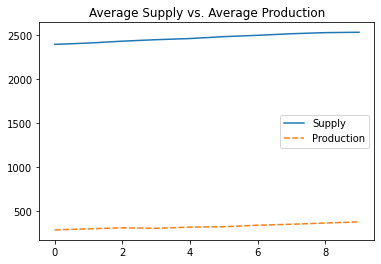

In [27]:
sns.lineplot(data=merged_dataset)
plt.title('Average Supply vs. Average Production')